# Example of SOM usage and its results

In this notebook, I am going to show SOM implementation on data and show its results

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from som import SOM
import cv2

In [3]:
# Initializing a random data
data = [[ 0.0, 0.15, 0.22, 0.03,0.2,0.5],
[ 0.82, 0.50, 0.23, 0.1,0.5,0.03],
[ 0.60, 0.14, 0.52, 0.01, 0.5,0.6],
[ 0.80, 0.53, 0.26, 0.01, 0.1, 0.5],
[ 0.19, 0.56, 0.22, 0.01, 0.1, 0.5],
[ 0.35, 0.65, 0.34, 0.04, 0.0, 0.2],
[ 0.67, 0.4, 0.87, 0.01, 0.6,0.8]]

In [4]:
# Initializing an SOM object
som = SOM(x_axis = 2, y_axis = 2,
          input_dimension = 6, sigma= 0.3, learning_rate = 0.01)

In [5]:
# Random weights initialization
som.random_weights_init(data)

In [6]:
# Training Self Organizing maps on the data
som.train(data, epochs=5)

In [15]:
# Checking the Nbytes of SOM learned reduced 2d-axis weights vs our provided data 
print("Learned Weights Size(bytes):",som.get_weights().nbytes)
print("Data Size(bytes):",np.array(data).nbytes)

Learned Weights Size(bytes): 192
Data Size(bytes): 336


## SOM training on Image 

In [84]:
# Creating a random 3 dimensional image data 
random_data = np.random.randint(0, 255, (50, 50, 3))
random_data = random_data/255

Text(0.5, 1.0, 'Training Data')

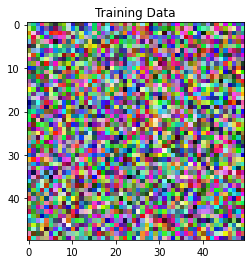

In [81]:
plt.imshow(random_data.reshape(50, 50, 3))
plt.title('Training Data')

In [85]:
# Reshaping the random_data to feed to the SOM
random_data = np.reshape(random_data, (random_data.shape[0]* random_data.shape[1], 3))

In [95]:
som = SOM(x_axis = 15, y_axis = 15,
          input_dimension = 3, sigma= 0.5, learning_rate = 0.05)

In [96]:
# Random Weights Initialization from data
som.random_weights_init(random_data)

In [97]:
som.get_weights()

array([[[0.50980392, 0.70196078, 0.27058824],
        [0.77647059, 0.13333333, 0.14117647],
        [0.81176471, 0.85490196, 0.99607843],
        [0.81960784, 0.2627451 , 0.45490196],
        [0.11764706, 0.05882353, 0.55294118],
        [0.31764706, 0.13333333, 0.49411765],
        [0.90980392, 0.2627451 , 0.79607843],
        [0.00392157, 0.48235294, 0.78431373],
        [0.99215686, 0.03529412, 0.54509804],
        [0.51764706, 0.70196078, 0.37647059],
        [0.52941176, 0.76078431, 0.27058824],
        [0.24313725, 0.1254902 , 0.49019608],
        [0.43137255, 0.85882353, 0.62352941],
        [0.3254902 , 0.8       , 0.40392157],
        [0.66666667, 0.53333333, 0.27058824]],

       [[0.73333333, 0.88627451, 0.43137255],
        [0.56078431, 0.20392157, 0.01568627],
        [0.29803922, 0.87058824, 0.94509804],
        [0.63921569, 0.06666667, 0.45882353],
        [0.56862745, 0.1372549 , 0.54117647],
        [0.38039216, 0.09803922, 0.07843137],
        [0.13333333, 0.24705882,

## Training on visualizing clusters on different epochs

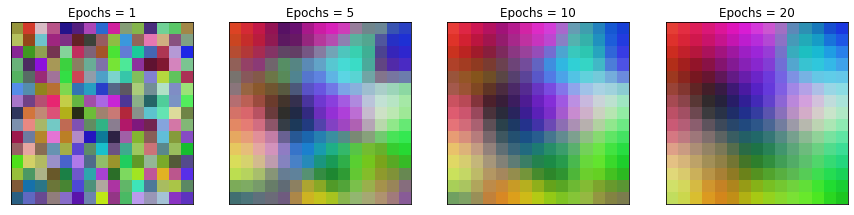

In [98]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    som.train(random_data, epochs=epochs)
    ax[i].imshow(som.get_weights())
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

As, we can see SOM clusters the colors after multiple epochs / iterations, it group the similar colors closer to each other.

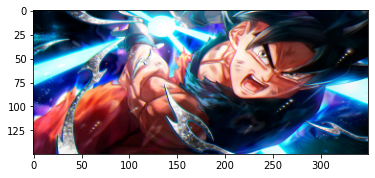

In [106]:
def read_image(path):
    image = plt.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (350,150), interpolation = cv2.INTER_AREA)
    plt.imshow(image)
    image = np.asarray(image)
    image = image/255
    return image

image = read_image('./image.jpg')

In [107]:
image.shape

(150, 350, 3)

In [108]:
image_reshaped = np.reshape(image, (image.shape[0]* image.shape[1], 3))

In [109]:
image_reshaped.shape

(52500, 3)

In [110]:
som = SOM(x_axis = 10, y_axis = 10,
          input_dimension = 3, sigma= 0.3, learning_rate = 0.1)

In [111]:
som.random_weights_init(image_reshaped)

Wall time: 17min 51s


Text(0.5, 1.0, 'Epochs = 5')

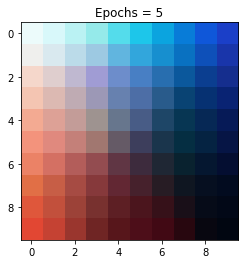

In [112]:
%%time
som.train(image_reshaped, epochs=5)
plt.imshow(som.get_weights())
plt.title('Epochs = ' + str(5))